### Exercise 12.6
Hint: probabilility distributions sum to one.

In [4]:
import math
import sympy
math.factorial(3)

6

In [5]:
def f(num):
    return math.factorial(num)

def get_probability_0(k_range,n,p):
    result = 1 - p
    sums = 0
    for k in range(k_range[0],k_range[1]+1):
        comb = f(n)/(f(k)*f(n-k))
        comb *= (p**k)*(1-p)**(8-k)
        sums += comb
    return result * sums

def get_probability_1(k_range,n,p):
    result = p
    sums = 0
    for k in range(k_range[0],k_range[1]+1):
        comb = f(n)/(f(k)*f(n-k))
        comb *= (p**k)*(1-p)**(8-k)
        sums += comb
    return result * sums

from sympy.abc import p
a = get_probability_0((0,4),8,p)
b = get_probability_0((8,5),8,p)
c = get_probability_1((0,3),8,p)
d = get_probability_1((4,8),8,p)

print(sympy.simplify(a+b+c+d).subs(p,0))


1.00000000000000


#i didn't know what to give p, in our case, I gave it either a 0 or a 1 and had the sum of 1. When I tried to simplify it, it didn't cancel out the p's though.

In [11]:
import pylab
import matplotlib.pyplot as plt

def f(x): ### iterative map is now defined as f(x)
    return (70*x**9 - 315*x**8 + 540*x**7 - 420*x**6 + 126*x**5)

def plot_cobweb(initial_xs):

    ### drawing diagonal line
    xmin, xmax = 0, 1
    plt.plot([xmin, xmax], [xmin, xmax],'k')

    ### drawing curve
    rng = pylab.arange(xmin, xmax, (xmax - xmin) / 20)
    plt.plot(rng, [f(x) for x in rng],'k')

    def mini_cobs(initial_x):
        initial_point=(initial_x,0)
        points = [initial_point]

        for i in range(10):
            if i%2 == 1: #odd
                y = points[-1][1]
                points.append((y,y))
            else:
                x = points[-1][0]
                y = f(x)
                points.append((x,y))

        plt.plot(   [x for x,_ in points],
                    [y for _,y in points],
                    'b')
    for x in initial_xs:
        mini_cobs(x)
        mini_cobs(x)
        mini_cobs(x)
    plt.xlabel("state x")
    plt.ylabel("state x+1")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.show()

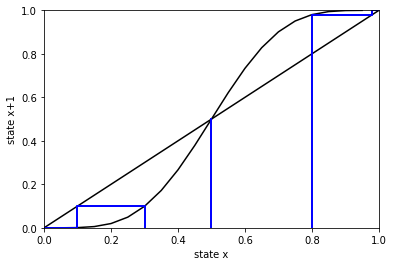

In [12]:
plot_cobweb([0.3,0.5,0.8])

**What this means**
There is one equilibrium point in the screen (although we can count 1,1 and 0,0) as equilibrium points to. At about 0.5, the point is at an inequilibrium, meaning that the cobweb will diverge. For the points in equilibrium (the ones that attract the cobweb, they are saying that the density of the environment would stay around this point (either 0 or 1). Although individual cells could change, the overall density would stay here. In our cases, given these absolute densities, it is most likely that all individual cells either die or not. The turning point would thus be around 0.5, saying that after this number or before it, we see the gravitation toward one of the stable points. THIS IS SO COOL. )

Rules for game of life

A dead (quiescent) cell will turn into a living (active) cell if and only if it is surrounded by exactly three living cells.
A living cell will remain alive if and only if it is surrounded by two or three other living cells. Otherwise it will die.
Given moore, top is 8

0 --> 1 (P) bounds 3,3
1 --> 1 (P) bounds 2,3

In [8]:
import sympy

# Use p as a symbolic variable
from sympy.abc import p

# The binomial coefficient function (n choose k)
from scipy.special import comb

result = (
(1-p) * sum([
comb(8, k) * p**k * (1-p)**(8-k)
for k in range(3, 4)]) +
p * sum([
comb(8, k) * p**k * (1-p)**(8-k)
for k in range(2, 4)]))
print(sympy.simplify(result))

p**3*(p - 1)**5*(28.0*p - 84.0)


In [13]:
#changing the function

def f(p): ### iterative map is now defined as f(x)
    return (p**3*(p - 1)**5*(28.0*p - 84.0))

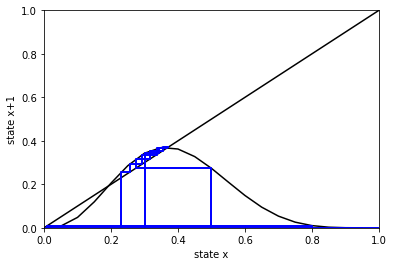

In [15]:
plot_cobweb([0,1,0.3,0.5,0.8,0.23])

In our case, we see that when the initial state of  is really large, then we might approach a state where all cells die. However, there is a sweet spot where we will be able to reach any of the two equilibrium states (other than total death) that would require an initial state between 0.2 and 0.6. :) 

For the simulation, it could be I have to extend the space of total cells (doing it 10x10 frame). But I normally get a 0.8% regardless of the position I start with. And no 0.3 density even though that was shown by the graph.